In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from datetime import timedelta
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("/home/thomas/repos/simplify_deployment/data/simplify_1_0/s1_minute_data.parquet")
df

,siCumulative
2019-08-31 22:00:00+00:00,-206.520
2019-08-31 22:01:00+00:00,-220.086
2019-08-31 22:02:00+00:00,-224.004
2019-08-31 22:03:00+00:00,-245.507
2019-08-31 22:04:00+00:00,-263.132
...,...
2023-10-31 22:55:00+00:00,-264.003
2023-10-31 22:56:00+00:00,-258.480
2023-10-31 22:57:00+00:00,-246.817
2023-10-31 22:58:00+00:00,-238.509


In [3]:
X_list = []
for lag in range(25,29):
    X_list.append(
        (
            df
            .add_suffix(f"_lag_{lag}")
            .shift(freq=timedelta(minutes=lag))
        )
    )
X = reduce(
    lambda a,b: pd.merge(a,b, left_index = True, right_index=True, how = "inner"),
    X_list,
)

In [4]:
X

,siCumulative_lag_25,siCumulative_lag_26,siCumulative_lag_27,siCumulative_lag_28
2019-08-31 22:28:00+00:00,-245.507,-224.004,-220.086,-206.520
2019-08-31 22:29:00+00:00,-263.132,-245.507,-224.004,-220.086
2019-08-31 22:30:00+00:00,-277.091,-263.132,-245.507,-224.004
2019-08-31 22:31:00+00:00,-282.933,-277.091,-263.132,-245.507
2019-08-31 22:32:00+00:00,-286.460,-282.933,-277.091,-263.132
...,...,...,...,...
2023-10-31 23:20:00+00:00,-264.003,-269.082,-270.579,-270.273
2023-10-31 23:21:00+00:00,-258.480,-264.003,-269.082,-270.579
2023-10-31 23:22:00+00:00,-246.817,-258.480,-264.003,-269.082
2023-10-31 23:23:00+00:00,-238.509,-246.817,-258.480,-264.003


In [5]:
y = (
    df
    .loc[df.index.minute % 15 == 14,:]
)
y

,siCumulative
2019-08-31 22:14:00+00:00,-264.364
2019-08-31 22:29:00+00:00,-77.065
2019-08-31 22:44:00+00:00,-46.560
2019-08-31 22:59:00+00:00,-46.199
2019-08-31 23:14:00+00:00,-38.767
...,...
2023-10-31 21:59:00+00:00,82.104
2023-10-31 22:14:00+00:00,116.606
2023-10-31 22:29:00+00:00,-22.183
2023-10-31 22:44:00+00:00,-172.970


In [6]:
Xy = X.merge(y, left_index = True, right_index=True)
Xy

,siCumulative_lag_25,siCumulative_lag_26,siCumulative_lag_27,siCumulative_lag_28,siCumulative
2019-08-31 22:29:00+00:00,-263.132,-245.507,-224.004,-220.086,-77.065
2019-08-31 22:44:00+00:00,-173.829,-185.072,-204.435,-233.959,-46.560
2019-08-31 22:59:00+00:00,-121.483,-89.782,-32.005,-16.613,-46.199
2019-08-31 23:14:00+00:00,-76.624,-62.948,-37.507,10.471,-38.767
2019-08-31 23:29:00+00:00,10.546,4.759,-9.614,-13.000,-16.160
...,...,...,...,...,...
2023-10-31 21:59:00+00:00,56.300,65.785,87.020,140.832,82.104
2023-10-31 22:14:00+00:00,88.762,114.306,142.561,165.898,116.606
2023-10-31 22:29:00+00:00,203.942,209.461,236.487,280.788,-22.183
2023-10-31 22:44:00+00:00,-63.350,-56.001,-42.282,4.112,-172.970


In [7]:
model = LinearRegression()
model.fit(
    Xy.iloc[:,:-1],
    Xy.iloc[:,-1]
)
prediction_df = pd.DataFrame(
    {
        "y_true": Xy["siCumulative"],
        "y_pred": model.predict(Xy.iloc[:,:-1]),
    },
    index = Xy.index,
)
prediction_df["residuals"] = prediction_df["y_true"] - prediction_df["y_pred"]
prediction_df

,y_true,y_pred,residuals
2019-08-31 22:29:00+00:00,-77.065,-152.448461,75.383461
2019-08-31 22:44:00+00:00,-46.560,-84.646500,38.086500
2019-08-31 22:59:00+00:00,-46.199,-97.997752,51.798752
2019-08-31 23:14:00+00:00,-38.767,-50.234023,11.467023
2019-08-31 23:29:00+00:00,-16.160,1.414269,-17.574269
...,...,...,...
2023-10-31 21:59:00+00:00,82.104,18.542345,63.561655
2023-10-31 22:14:00+00:00,116.606,8.380387,108.225613
2023-10-31 22:29:00+00:00,-22.183,91.503309,-113.686309
2023-10-31 22:44:00+00:00,-172.970,-37.348825,-135.621175


In [8]:
mi_base = mutual_info_regression(prediction_df[["y_true"]], prediction_df["y_true"])
mi_base

array([10.57820275])

In [9]:
mi_values = {
    "lag": [],
    "mi": [],
}
for lag in range(100):
    lagged_residual = (
        prediction_df[["residuals"]]
        .add_suffix(f"_lag_{lag}_qh")
        .shift(
            freq = timedelta(minutes = 15*lag)
        )
    )
    target = prediction_df["residuals"]
    merged = lagged_residual.merge(target, left_index = True, right_index=True, how = "inner")
    mi_values["lag"].append(lag)
    mi_values["mi"].append(
        mutual_info_regression(
            merged.iloc[:,[0]],
            merged.iloc[:,1]
        ),
    )


(0.0, 0.2)

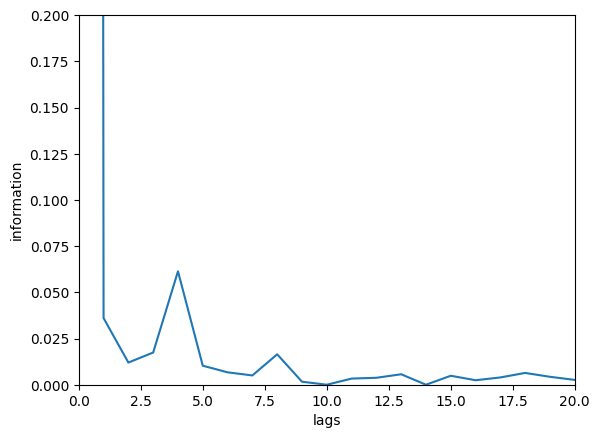

In [10]:
fig, ax = plt.subplots()
ax.plot(mi_values["lag"], mi_values["mi"])
ax.set_xlabel("lags")
ax.set_ylabel("information")
ax.set_xlim(0,20)
ax.set_ylim(0,0.2)

In [11]:
noise_mi_values = []
target = prediction_df["residuals"]
for i in range(1000):
    noise = np.random.normal(0,1,len(target)).reshape(-1,1)
    noise_mi_values.append(
        mutual_info_regression(noise, target)[0]
    )
    print(f"{i} done with mi of {noise_mi_values[-1]}")

0 done with mi of 0.0015110059531231457
1 done with mi of 0.0019572341276647975
2 done with mi of 0
3 done with mi of 6.8774791062153895e-06
4 done with mi of 0.0024816484098026947
5 done with mi of 0
6 done with mi of 0
7 done with mi of 0
8 done with mi of 0.0008098615631384476
9 done with mi of 0.005100058421344755
10 done with mi of 0
11 done with mi of 0.0017250386444676025
12 done with mi of 0.0013499145557274161
13 done with mi of 0.00012782173812908582
14 done with mi of 0
15 done with mi of 0
16 done with mi of 0
17 done with mi of 4.8785351065561144e-05
18 done with mi of 0
19 done with mi of 0.0013437909917461965
20 done with mi of 0.003394850190518106
21 done with mi of 0.0027233298216700064
22 done with mi of 0
23 done with mi of 0
24 done with mi of 0
25 done with mi of 0
26 done with mi of 0.0016631872174839302
27 done with mi of 0.0018788301973655663
28 done with mi of 0
29 done with mi of 0
30 done with mi of 0.0002517678246789501
31 done with mi of 0.00078065416662553

In [12]:
p99_mi_noise = np.percentile(noise_mi_values, 99)
p99_mi_noise

0.004767307194659701

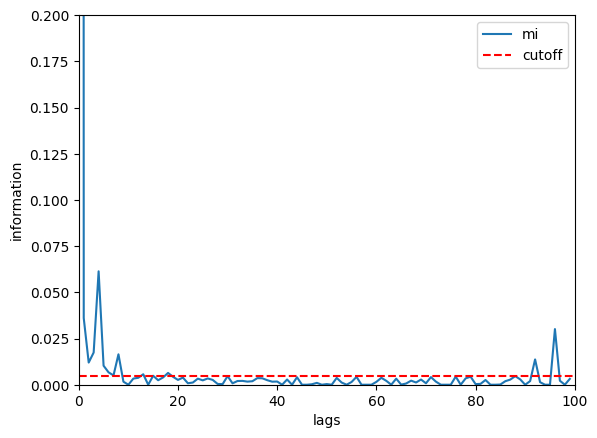

In [17]:
fig, ax = plt.subplots()
ax.plot(mi_values["lag"], mi_values["mi"], label = "mi")
ax.axhline(y=p99_mi_noise, color='r', linestyle='--', label = "cutoff")
ax.set_xlabel("lags")
ax.set_ylabel("information")
ax.set_xlim(0,100)
ax.set_ylim(0,0.2)
ax.legend()

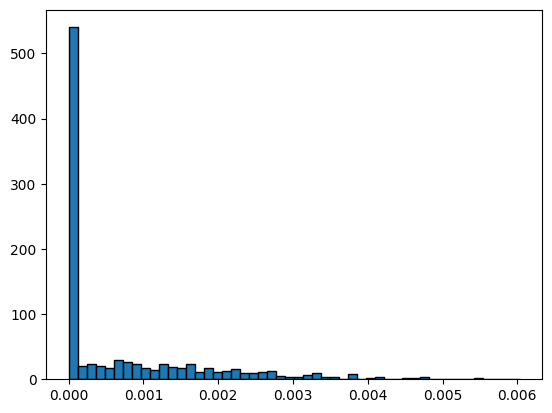

In [14]:
fig, ax = plt.subplots()
ax.hist(noise_mi_values, bins = 50, edgecolor = "black", label = "noise mi distribution")
fig.show()

In [15]:
noise = np.random.normal(0,1,(len(target),10))
mutual_info_regression(noise, target)


array([0.00145748, 0.00178298, 0.        , 0.00204143, 0.        ,
       0.        , 0.00173065, 0.        , 0.        , 0.00050059])